

> # Creating The data set



In [1]:
import numpy as np
#creating A
A_mat=-1*np.ones((9,7)).flatten()
index_A=[3,10,17,23,25,30,32,36,37,38,39,40,43,47,50,54,56,57,58,60,61,62]
A_mat[index_A]=1
# A_mat=A_mat.reshape((9,7))
A_mat=A_mat.reshape(-1,1)

#creating B
B_mat=-1*np.ones((9,7)).flatten()
index_B=[0,1,2,3,4,5,6,7,13,14,19,21,25,28,29,30,31,35,39,42,47,49,55,56,57,58,59,60,61,62]
B_mat[index_B]=1
B_mat=B_mat.reshape(-1,1)

#creating C
C_mat=-1*np.ones((9,7)).flatten()
index_C=[2,3,4,5,8,13,14,21,28,35,42,50,55,58,59,60,61]
C_mat[index_C]=1
C_mat=C_mat.reshape(-1,1)

##new A , B,C
A_new=np.array([-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1]).reshape(-1,1)
B_new=np.array([1,1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,-1]).reshape(-1,1)
C_new=np.array([-1,1,1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1]).reshape(-1,1)

# Plotting The Dataset

In [2]:
import matplotlib.pyplot as plt
def plot_char_dataset(dataset, plot_targets=False):
  l = len(dataset)
  fig = plt.figure(figsize=(9,3 + plot_targets*3))
  for i in range(l):
    ax = fig.add_subplot(1+plot_targets,l,i+1)
    ax.imshow(np.array(dataset[i][0].reshape((9,7))),cmap='Greys')
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    # ax.axis('off')
    if(plot_targets):
      ax = fig.add_subplot(1+plot_targets,l,i+1+l)
      ax.imshow(np.array(dataset[i][1].reshape((5,3))),cmap='Greys')
      # Turn off tick labels
      ax.set_yticklabels([])
      ax.set_xticklabels([])
      # ax.axis('off')

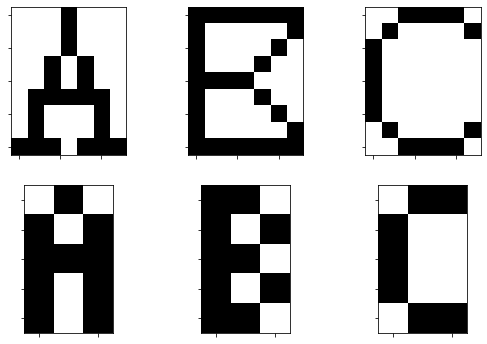

In [3]:
charset=np.array([[A_mat,A_new],[B_mat,B_new],[C_mat,C_new]], dtype="object")
plot_char_dataset(charset, plot_targets=True)

# Part A

In [4]:
W = np.zeros([63, 15])
for i in range(3):
  s, t = np.array(charset[i,0]).flatten(), np.array(charset[i,1]).flatten()
  W += np.transpose([s]).dot([t])

In [5]:
def evaluate(dataset, W):
  sum=0
  is_recognized = np.zeros((len(dataset),1))
  for i in range(len(dataset)):
    s, t = np.array(dataset[i,0]).flatten(), np.array(dataset[i,1]).flatten()
    t_hat = np.sign(np.array([s]).dot(W))
    if((t_hat-t==0).all()):
      is_recognized[i] = 1
      sum+=1  
  return is_recognized,sum

In [6]:
if((evaluate(charset, W)[0]==[1,1,1]).all()):
  print('Target pattern has been fully recognized by the network')
else:
  print('Target pattern has not been completly recognized by the network')
  print(evaluate(charset, W)[1])
  print(evaluate(charset, W)[0]==1)

Target pattern has been fully recognized by the network


# Part B

In [7]:
import random
random.seed(41)
epoch=1000
sum=0
sum_a=0
sum_b=0
sum_c=0
# WW = np.zeros([63, 15])
for e in range(epoch):
  noise_ratio=6                                        #******change between 6 and 16
  randomlist_a = random.sample(range(0, 62), noise_ratio) 
  randomlist_b = random.sample(range(0, 62), noise_ratio)
  randomlist_c = random.sample(range(0, 62), noise_ratio)
  A_mat_noisy=A_mat.copy()
  A_mat_noisy[randomlist_a]*=-1
  B_mat_noisy=B_mat.copy()
  B_mat_noisy[randomlist_b]*=-1
  C_mat_noisy=C_mat.copy()
  C_mat_noisy[randomlist_c]*=-1

  a_diff=np.sign(A_mat_noisy.reshape((1,63)).dot(W))-A_new.reshape((1,15))
  b_diff=np.sign(B_mat_noisy.reshape((1,63)).dot(W))-B_new.reshape((1,15))
  c_diff=np.sign(C_mat_noisy.reshape((1,63)).dot(W))-C_new.reshape((1,15))
  if ((a_diff==0).all() & (b_diff==0).all() & (c_diff==0).all()):
    sum+=1

  if ((a_diff==0).all()):
      sum_a+=1
  if ((b_diff==0).all()):
      sum_b+=1
  if ((c_diff==0).all()):
      sum_c+=1

print(sum_a,sum_b,sum_c)

1000 1000 1000


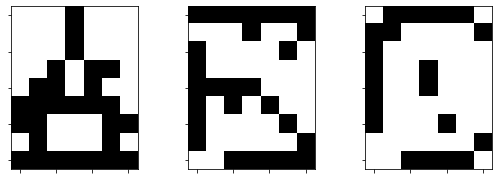

In [8]:
charset_noisy=np.array([[A_mat_noisy,A_new],[B_mat_noisy,B_new],[C_mat_noisy,C_new]],dtype="object")
plot_char_dataset(charset_noisy, plot_targets=False)

# Part C

In [9]:
import random
random.seed(40)
epoch=1000
sum=0
sum_a=0
sum_b=0
sum_c=0
# WWW = np.zeros([63, 15])
for e in range(epoch):
  miss_ratio=16                                       #change between 6 and 16
  #Generate 5 random numbers between 10 and 30
  randomlist_a = random.sample(range(0, 62), miss_ratio) 
  randomlist_b = random.sample(range(0, 62), miss_ratio)
  randomlist_c = random.sample(range(0, 62), miss_ratio)
  A_mat_missing=A_mat.copy()
  A_mat_missing[randomlist_a]=0
  B_mat_missing=B_mat.copy()
  B_mat_missing[randomlist_b]=0
  C_mat_missing=C_mat.copy()
  C_mat_missing[randomlist_c]=0

  a_diff=np.sign(A_mat_missing.reshape((1,63)).dot(W))-A_new.reshape((1,15))
  b_diff=np.sign(B_mat_missing.reshape((1,63)).dot(W))-B_new.reshape((1,15))
  c_diff=np.sign(C_mat_missing.reshape((1,63)).dot(W))-C_new.reshape((1,15))

  if ((a_diff==0).all() & (b_diff==0).all() & (c_diff==0).all()):
    sum+=1
  if ((a_diff==0).all()):
      sum_a+=1
  if ((b_diff==0).all()):
      sum_b+=1
  if ((c_diff==0).all()):
      sum_c+=1

  # if ((np.sign(A_mat_missing.reshape((1,63)).dot(W))-A_new.reshape((1,15))==0).all() & (np.sign(B_mat_missing.reshape((1,63)).dot(W))-B_new.reshape((1,15))==0).all() & (np.sign(C_mat_missing.reshape((1,63)).dot(W))-C_new.reshape((1,15))==0).all()):
  #   sum+=1
print(sum_a,sum_b,sum_c)

1000 1000 1000


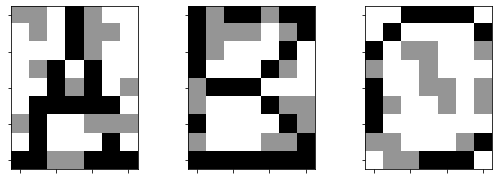

In [10]:
  charset_missing=np.array([[A_mat_missing,A_new],[B_mat_missing,B_new],[C_mat_missing,C_new]],dtype="object")
plot_char_dataset(charset_missing, plot_targets=False)